The goal here is to find one non-repeting pattern in an image. First, find the pattern, then second, compute correlation.


<!-- TEASER_END -->

Let's first initialize the notebook:

In [27]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
phi = (np.sqrt(5)+1)/2
fig_width = 10
figsize = (fig_width, fig_width/phi)

In [28]:
import imageio as io
im = io.imread('../files/2021-12-01-99999999999998.jpg')
im = im.sum(axis=-1)

/var/folders/3s/q2x8bxzj43g4rdvb2wjt67640000gq/T/ipykernel_29678/4183421235.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = io.imread('../files/2021-12-01-99999999999998.jpg')


In [29]:
N_X, N_Y = im.shape
N_X, N_Y

(900, 1220)

Original image

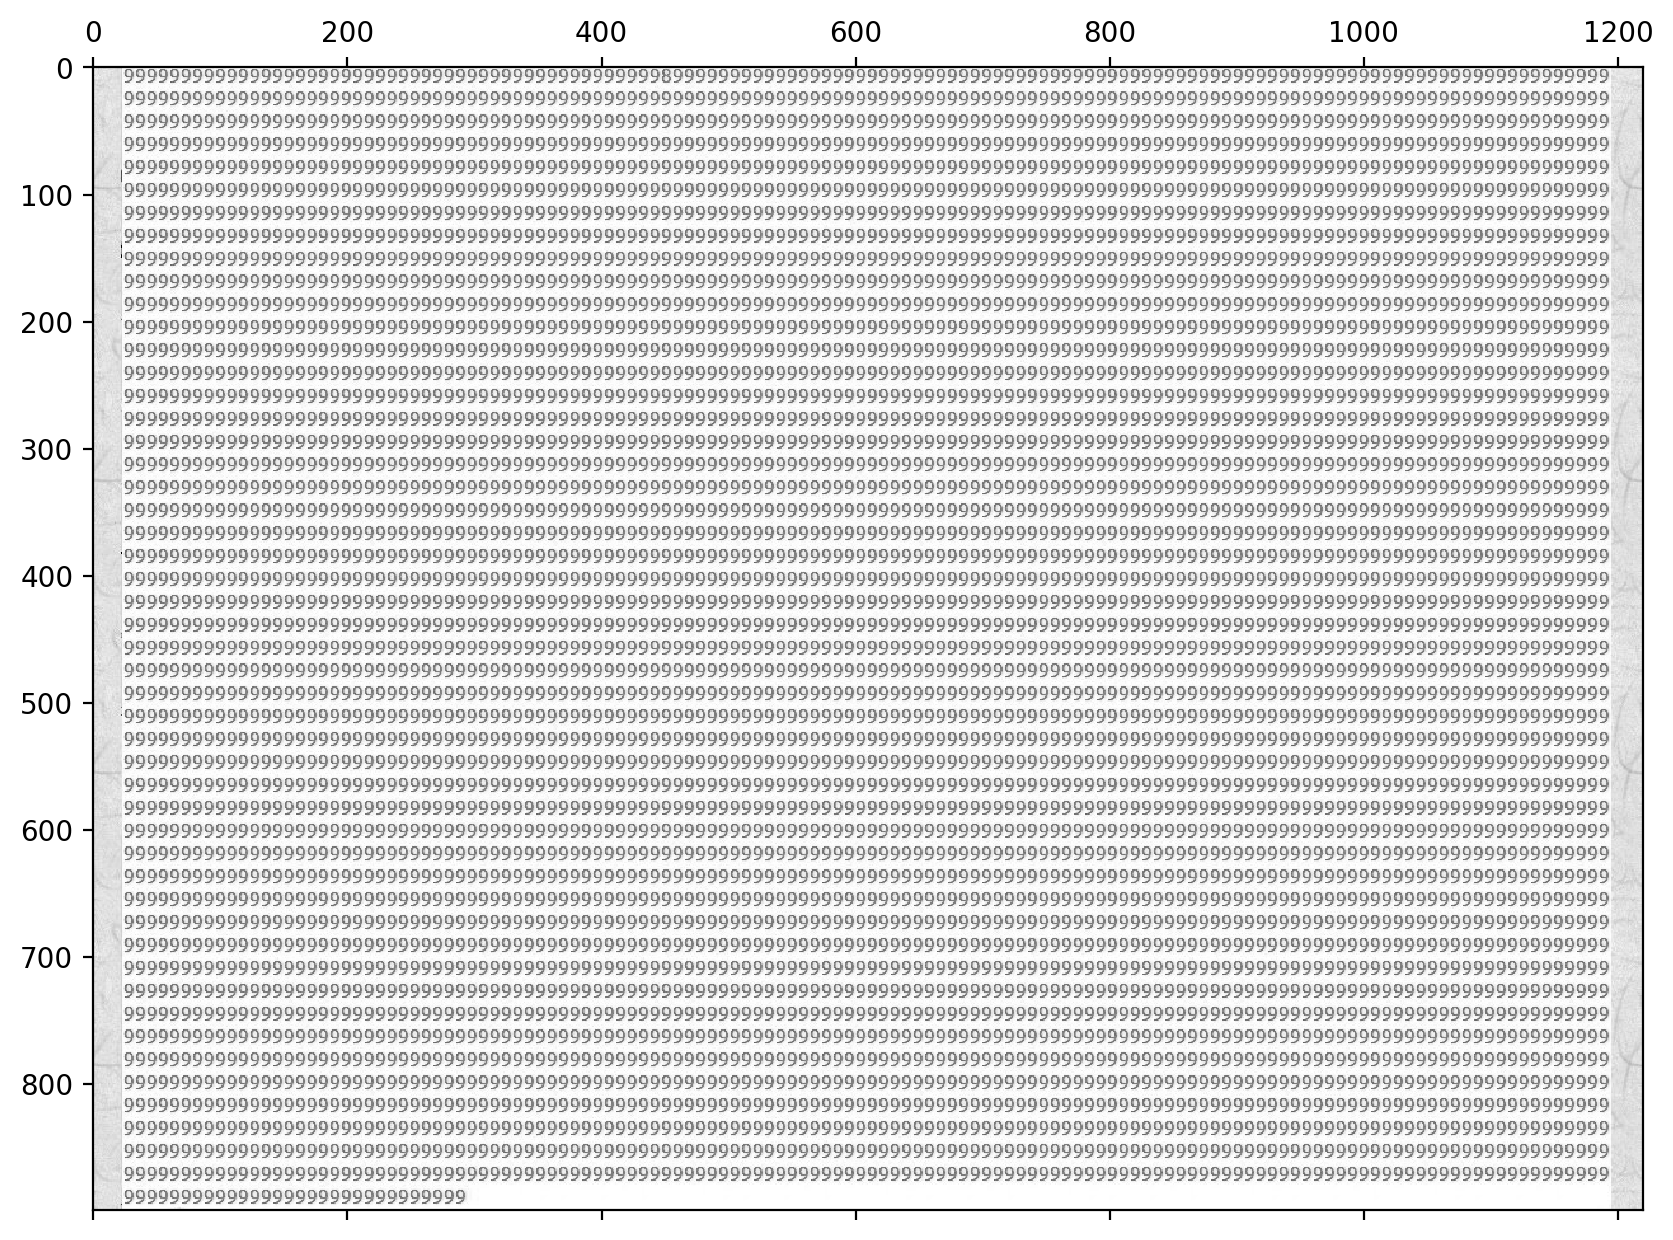

In [30]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
ax.matshow(im, cmap=plt.gray());

Zoom

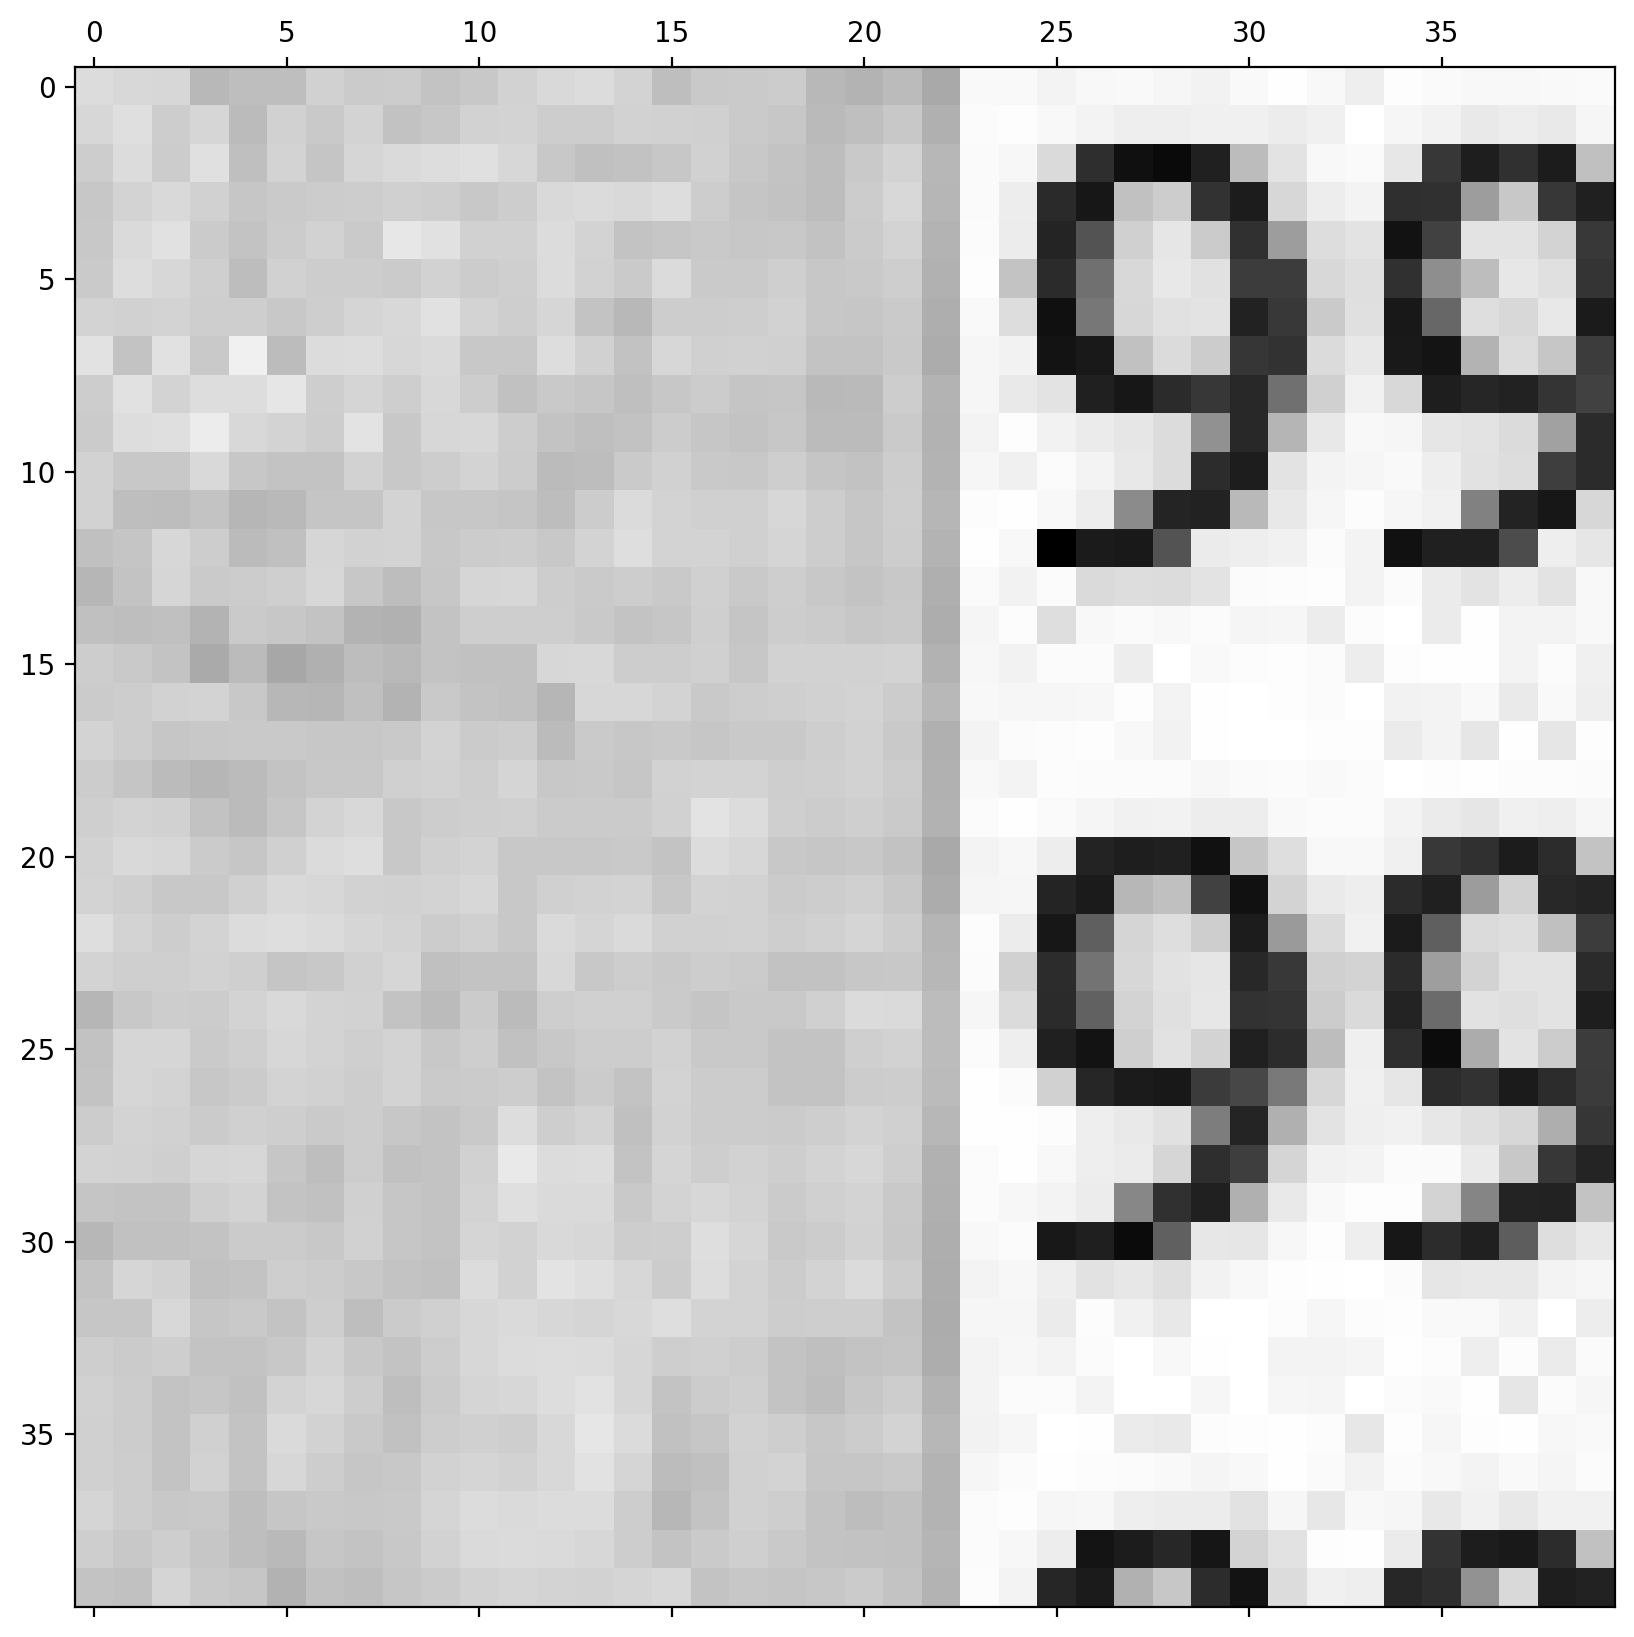

In [31]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
ax.matshow(im[:40, :40]);

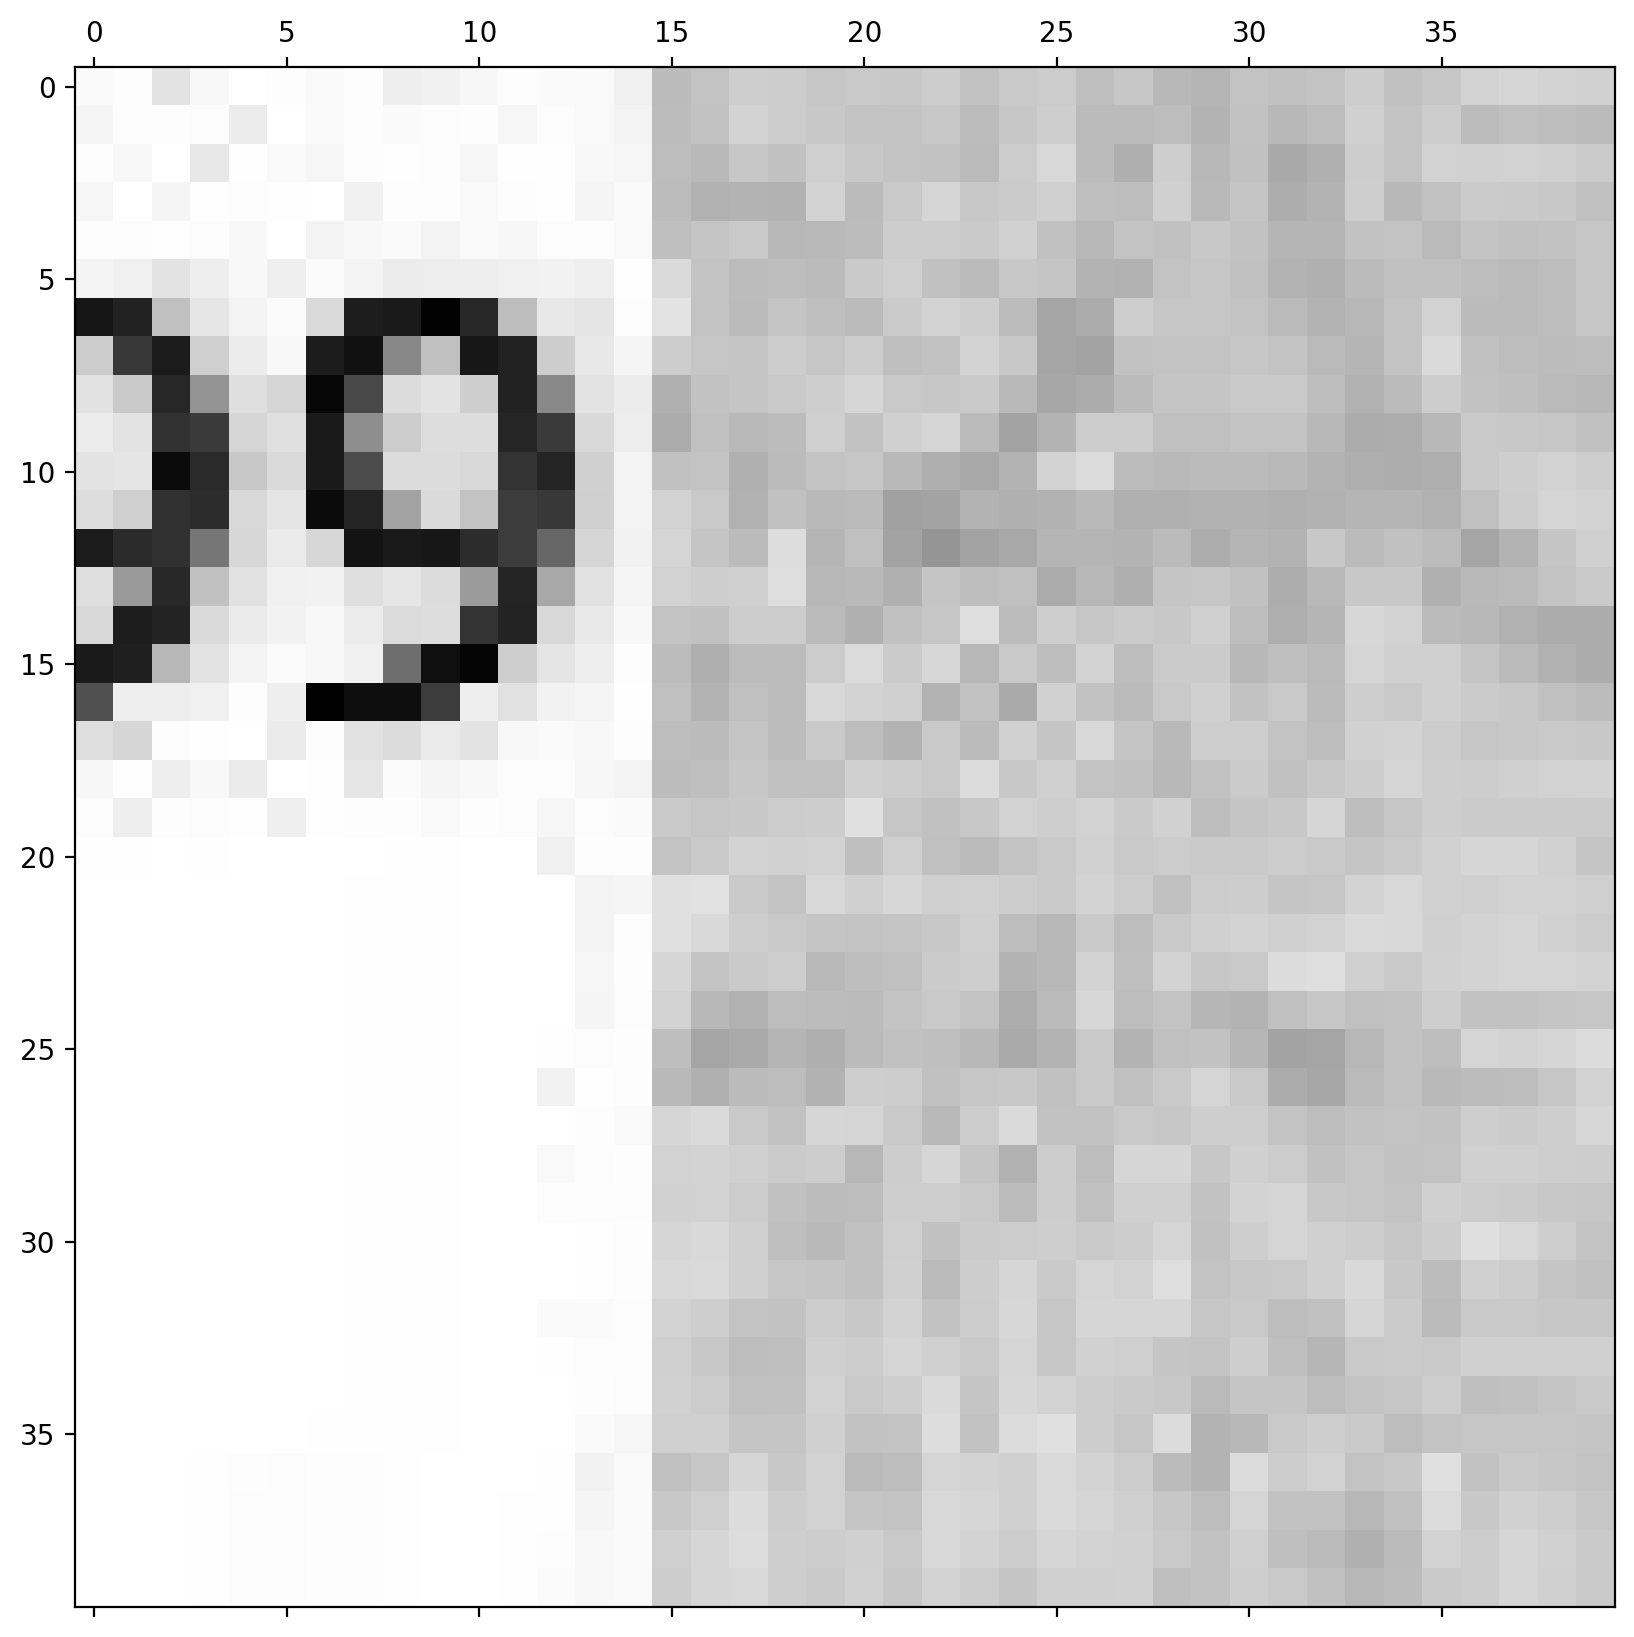

In [32]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
ax.matshow(im[-40:, -40:]);

Crop

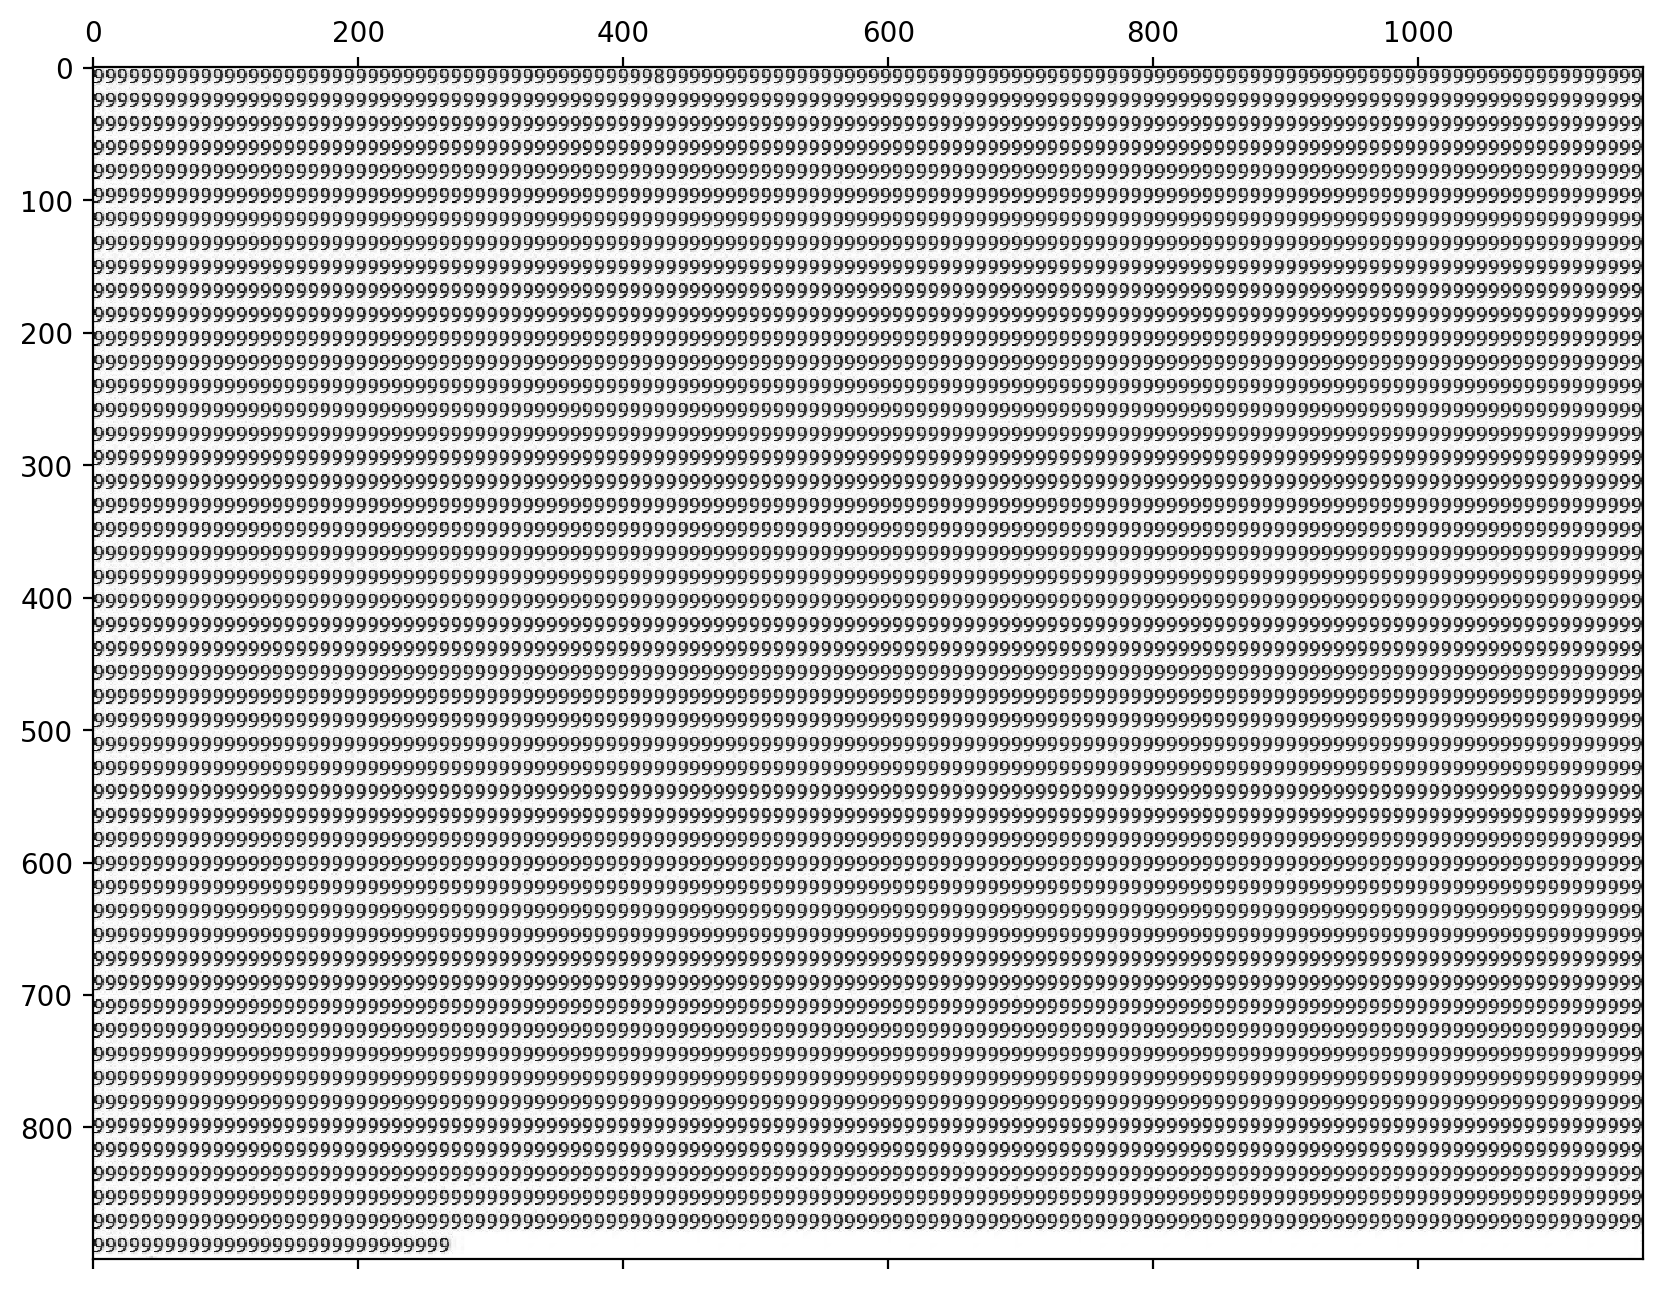

In [33]:
im = im[:, 24:1194]
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
ax.matshow(im, cmap=plt.gray());

Average on one axis

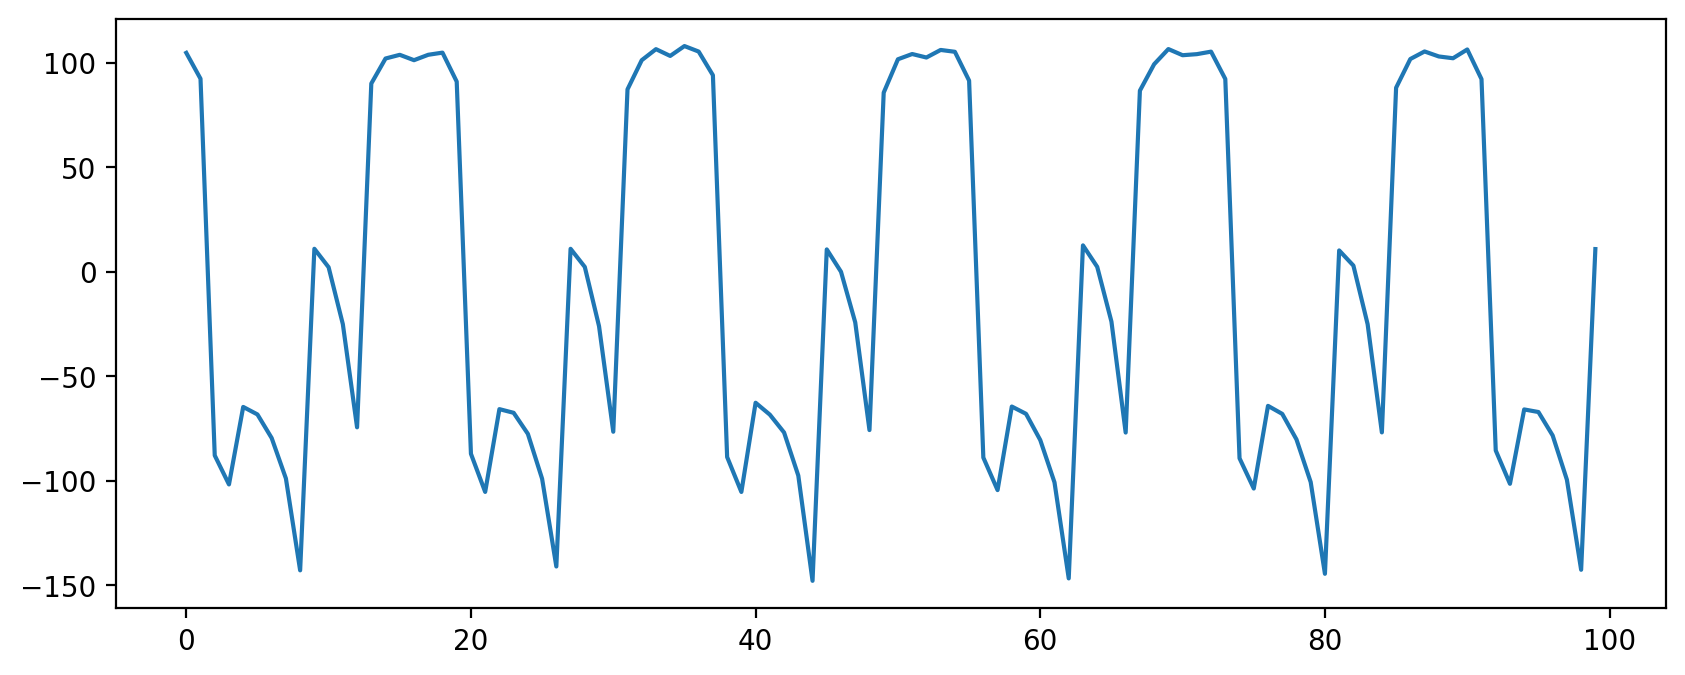

In [34]:
im_x = im.mean(axis=1)
im_x = np.roll(im_x, N_X//2) # avoid border effects
#im_x = np.correlate(im_x, [-1, 2, 1], 'same')*1. # contrast detection
im_x -= im_x.mean()
fig, ax = plt.subplots(figsize=(fig_width, fig_width/phi**2))
ax.plot(im_x[:100]);

Cross-correlation

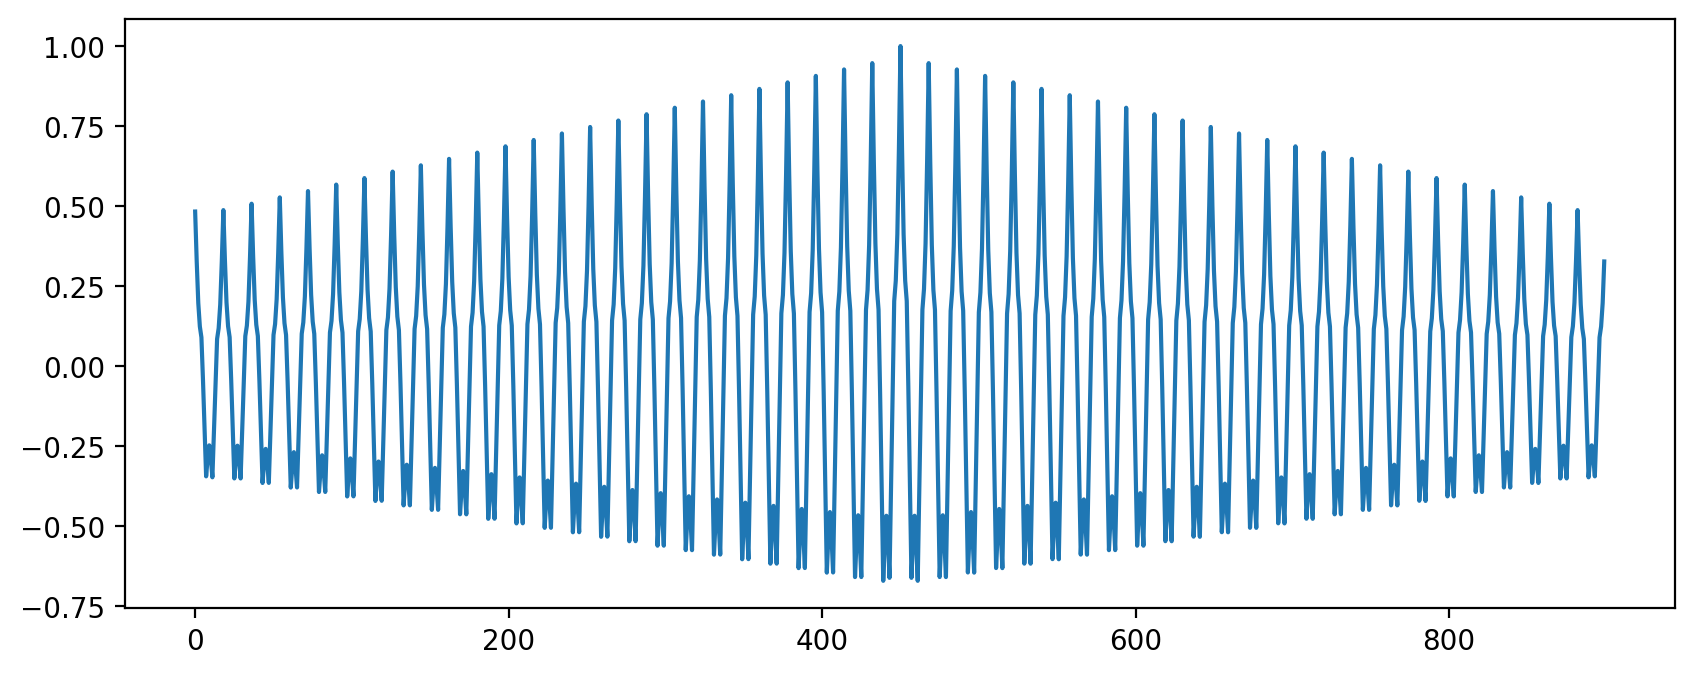

In [35]:
xcorr = np.correlate(im_x, im_x, 'same')*1.
xcorr /= xcorr.max()
fig, ax = plt.subplots(figsize=(fig_width, fig_width/phi**2))
ax.plot(xcorr);

In [36]:
N_X//2, im_x.shape, xcorr.shape, im.shape

(450, (900,), (900,), (900, 1170))

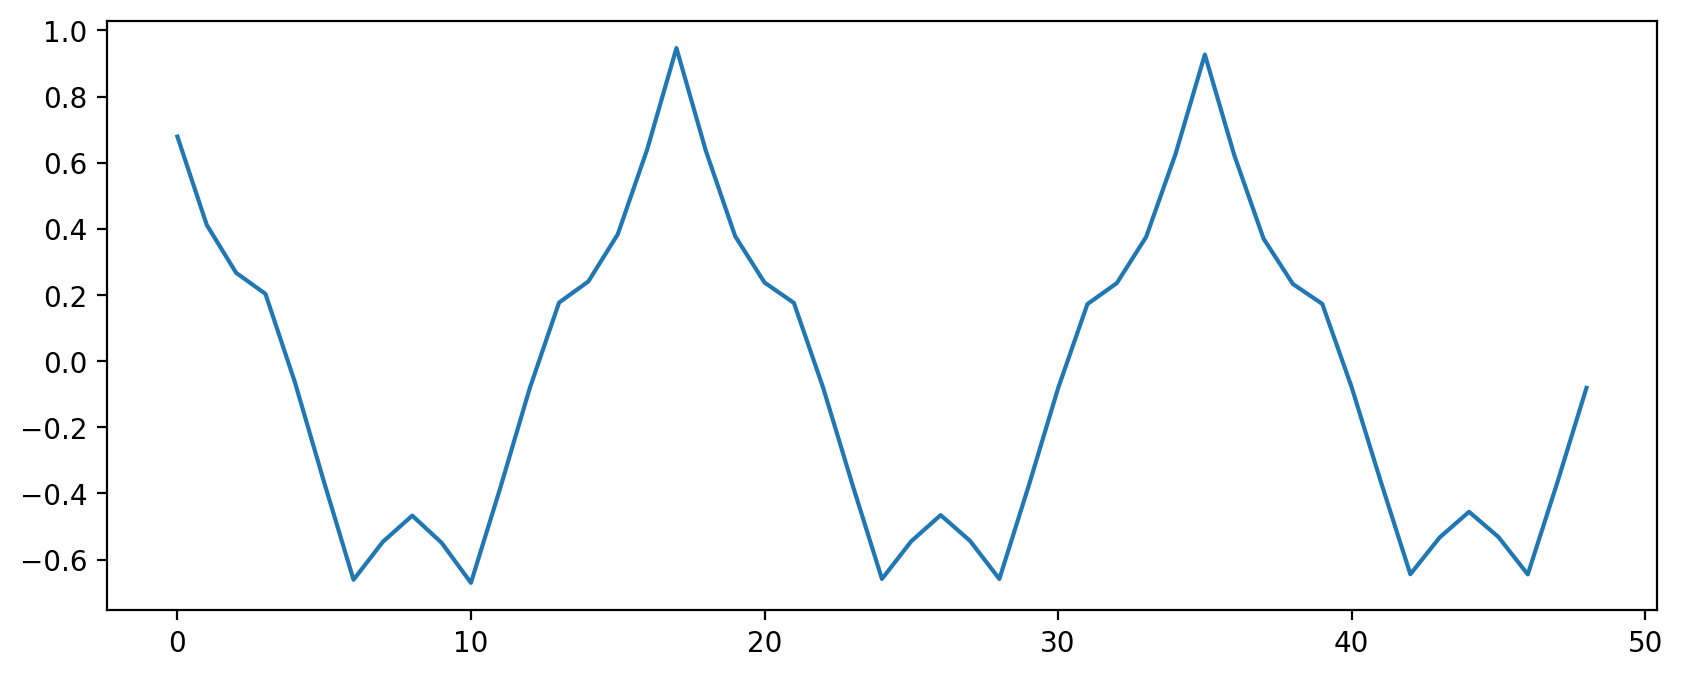

In [37]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width/phi**2))
ax.plot(xcorr[(N_X//2+1):(50+N_X//2)]);

In [38]:
period_X = np.argmax(xcorr[(1+N_X//2):]) + 1

In [39]:
print(f'{period_X=}')

period_X=18


The other dimension:

In [40]:
im_y = im.mean(axis=0)
im_y -= im_y.mean()
#im_y[-1] = im_y[0]
#im_y[-2] = im_y[1]
im_y = np.roll(im_y, N_Y//2) # avoid border effects
#im_y = np.correlate(im_y, [-1, 2, -1], 'same')*1. # contrast detection

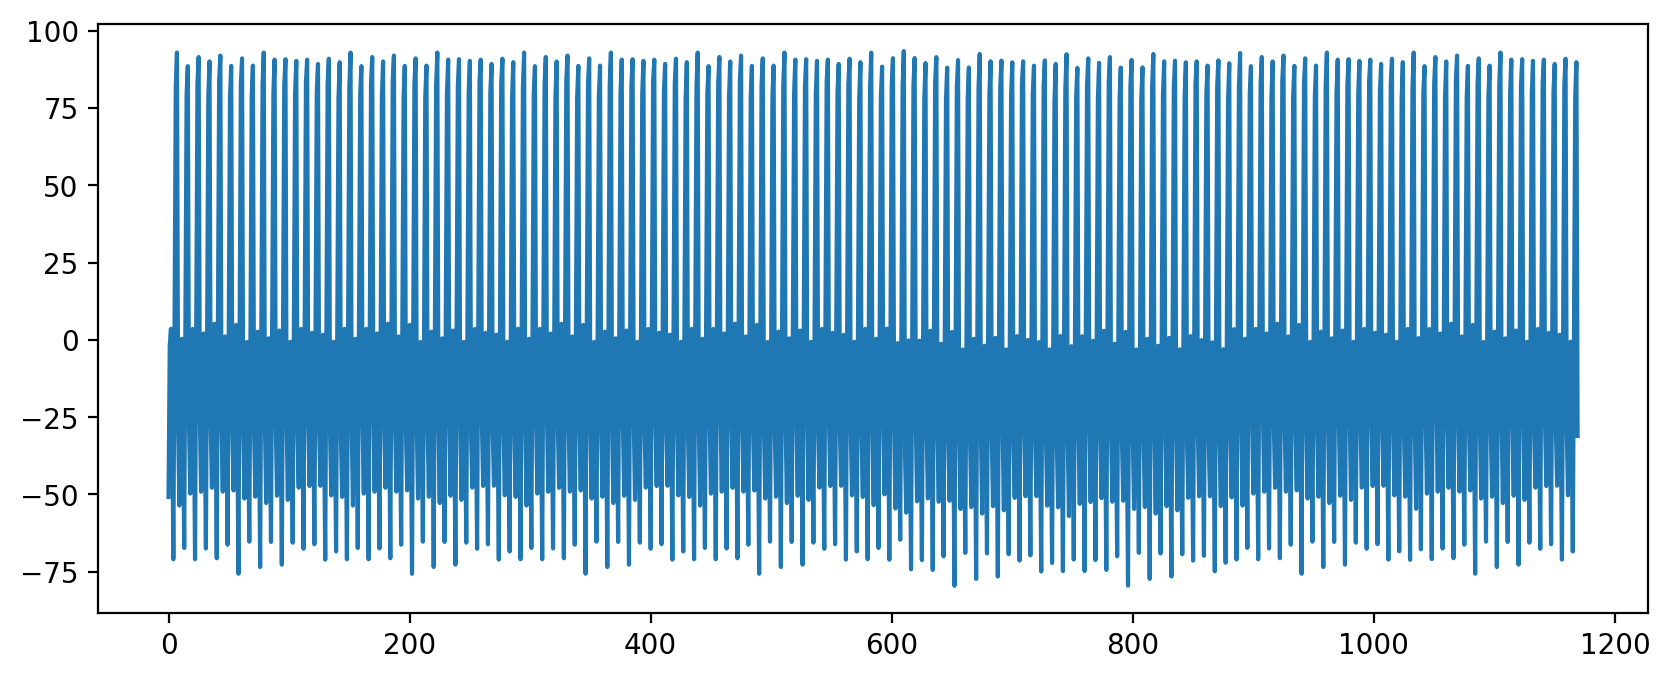

In [41]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width/phi**2))
ax.plot(im_y);

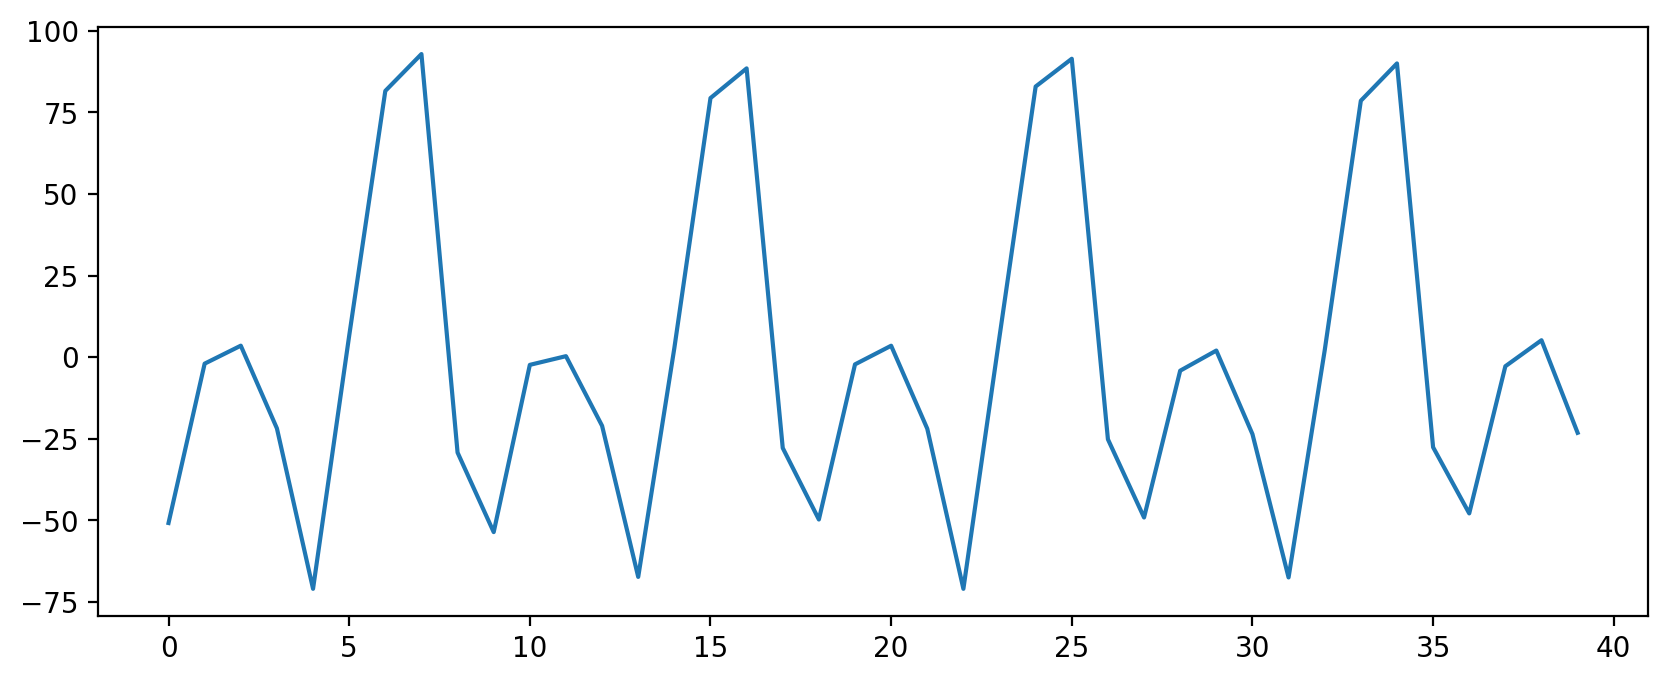

In [42]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width/phi**2))
ax.plot(im_y[:40]);

In [43]:
xcorr = np.correlate(im_y, im_y, 'same')*1.

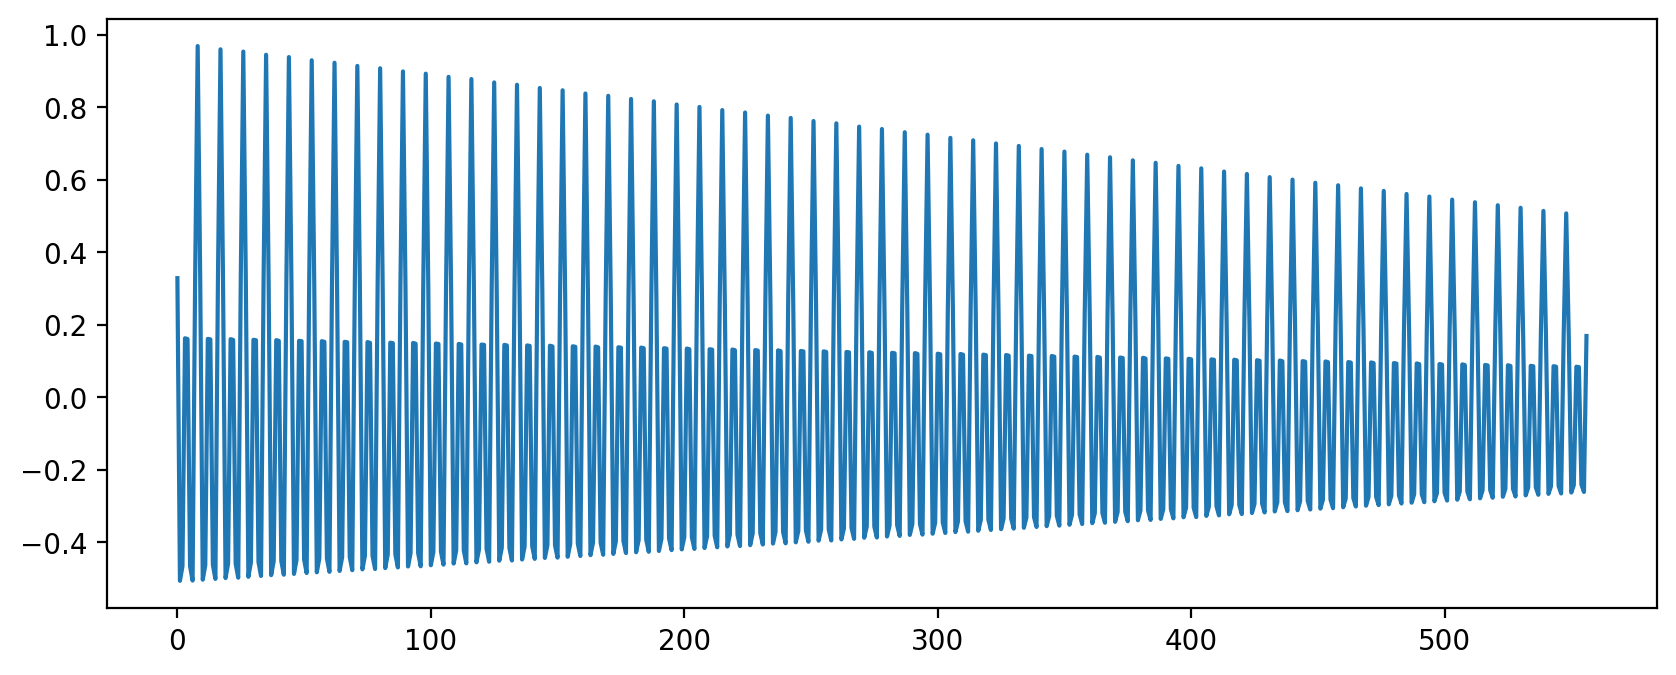

In [44]:
xcorr /= xcorr.max()
fig, ax = plt.subplots(figsize=(fig_width, fig_width/phi**2))
ax.plot(xcorr[(N_Y//2+3):]);

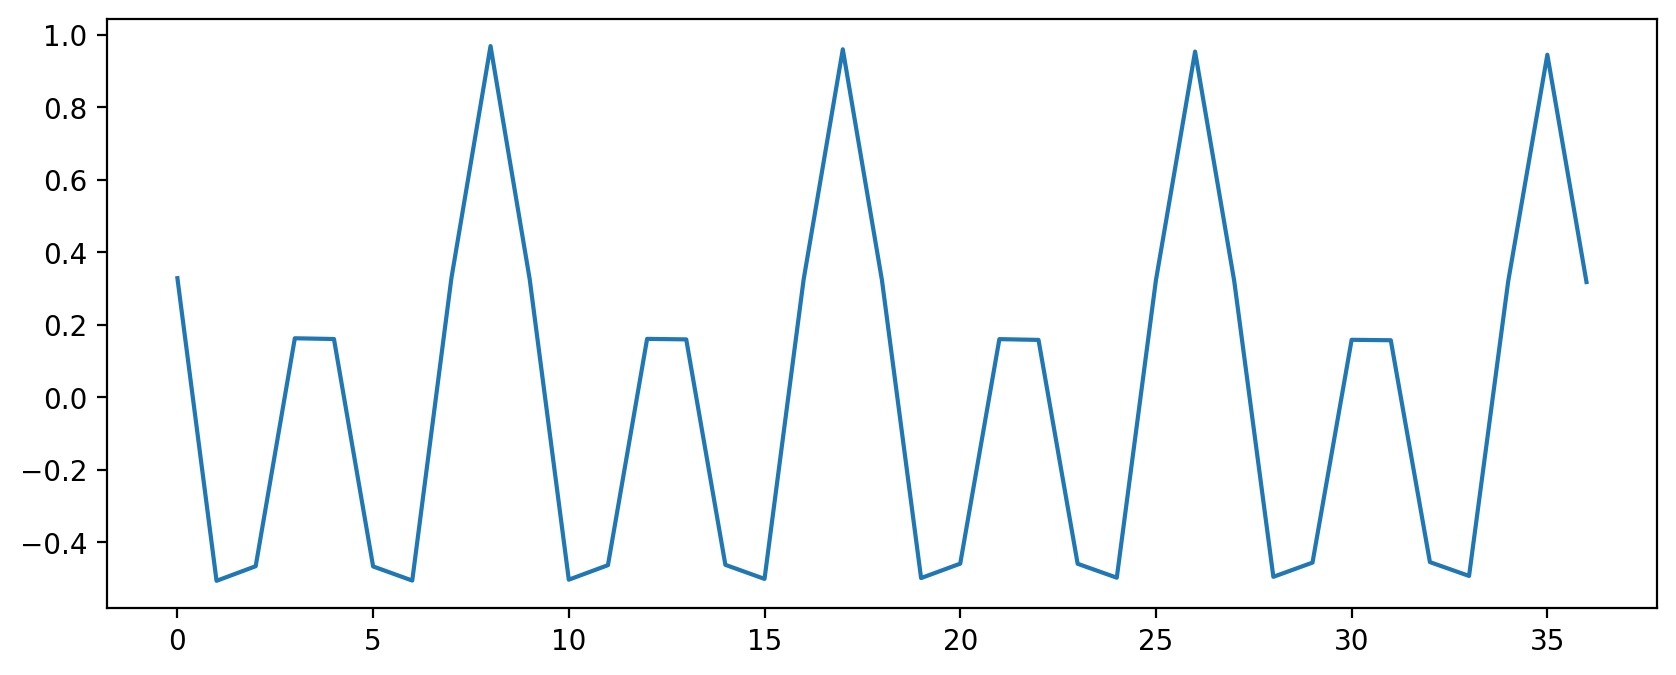

In [45]:
xcorr /= xcorr.max()
fig, ax = plt.subplots(figsize=(fig_width, fig_width/phi**2))
ax.plot(xcorr[(N_Y//2+3):(40+N_Y//2)]);

In [46]:
period_Y = np.argmax(xcorr[(3+N_Y//2):]) + 3

In [47]:
print(f'{period_Y=}')

period_Y=11


One sample (other random choices would *most probably* fit - do not go in the borders!)

In [48]:
idx, idy = 0, 26
kernel = im[idx:idx+period_X, idy:idy+period_Y]

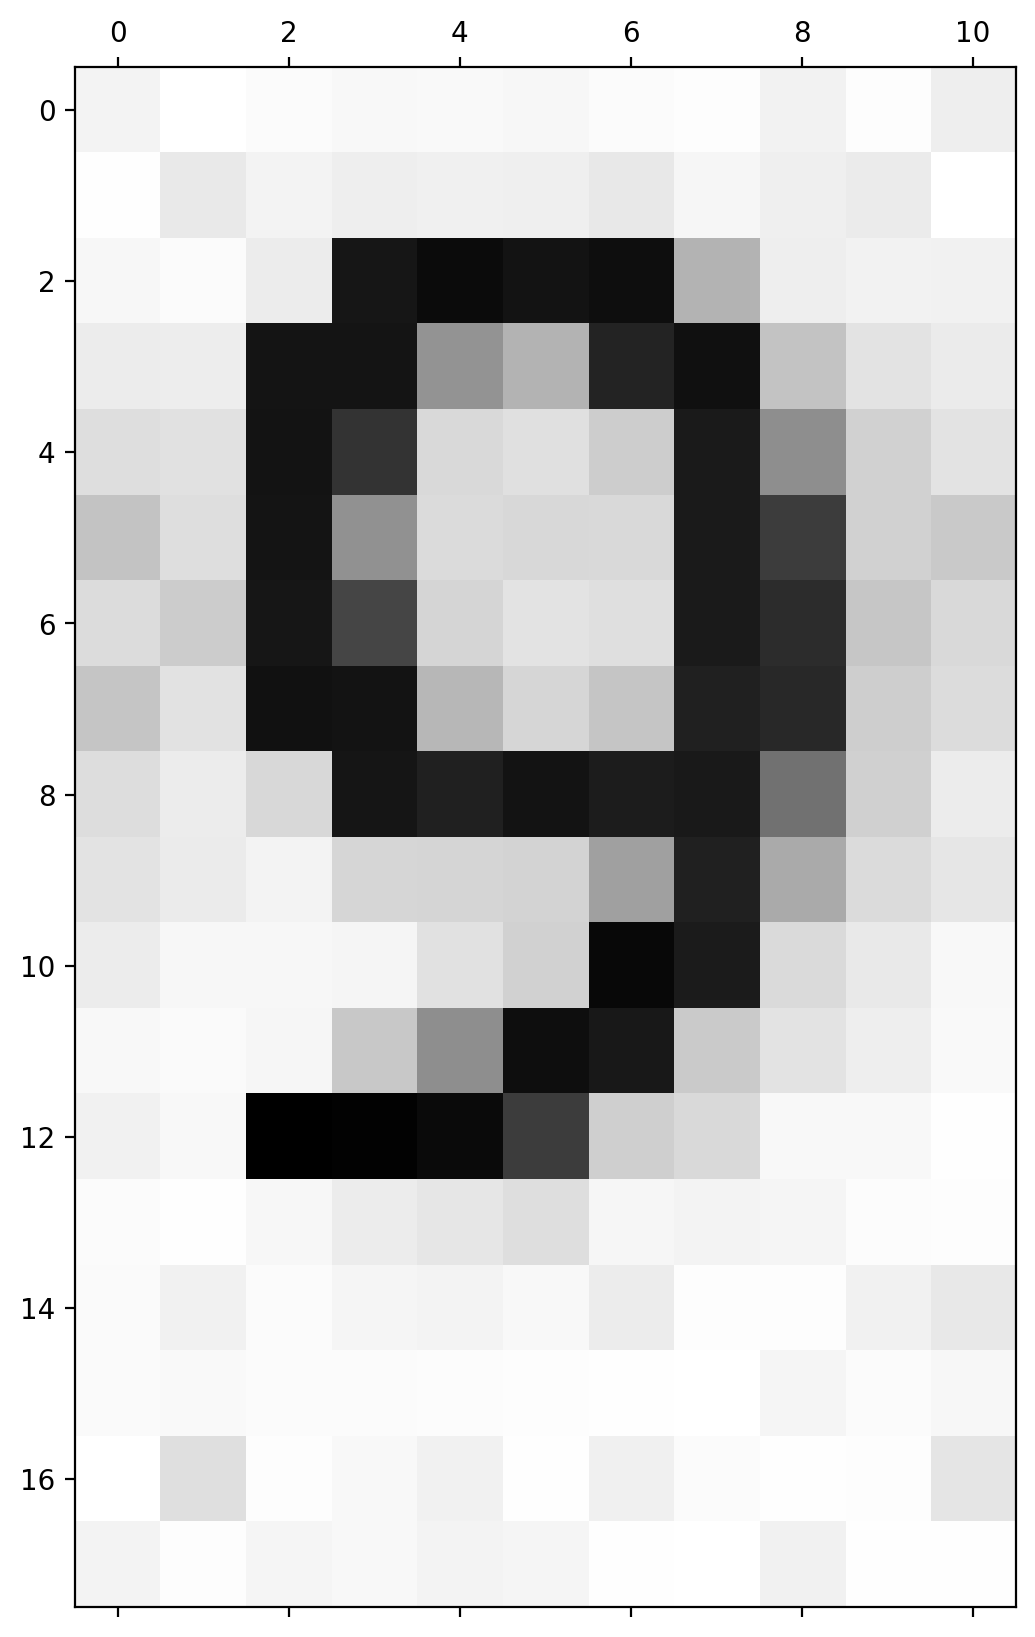

In [49]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
ax.matshow(kernel);

compute cross correlation using 
https://laurentperrinet.github.io//sciblog/posts/2017-09-20-the-fastest-2d-convolution-in-the-world.html


In [50]:
from numpy.fft  import fft2, ifft2
xcorr = np.real(ifft2(fft2(im)*fft2(kernel, s=im.shape)))

Now you can spot where there is a difference (and then in the rest due to kerning...)

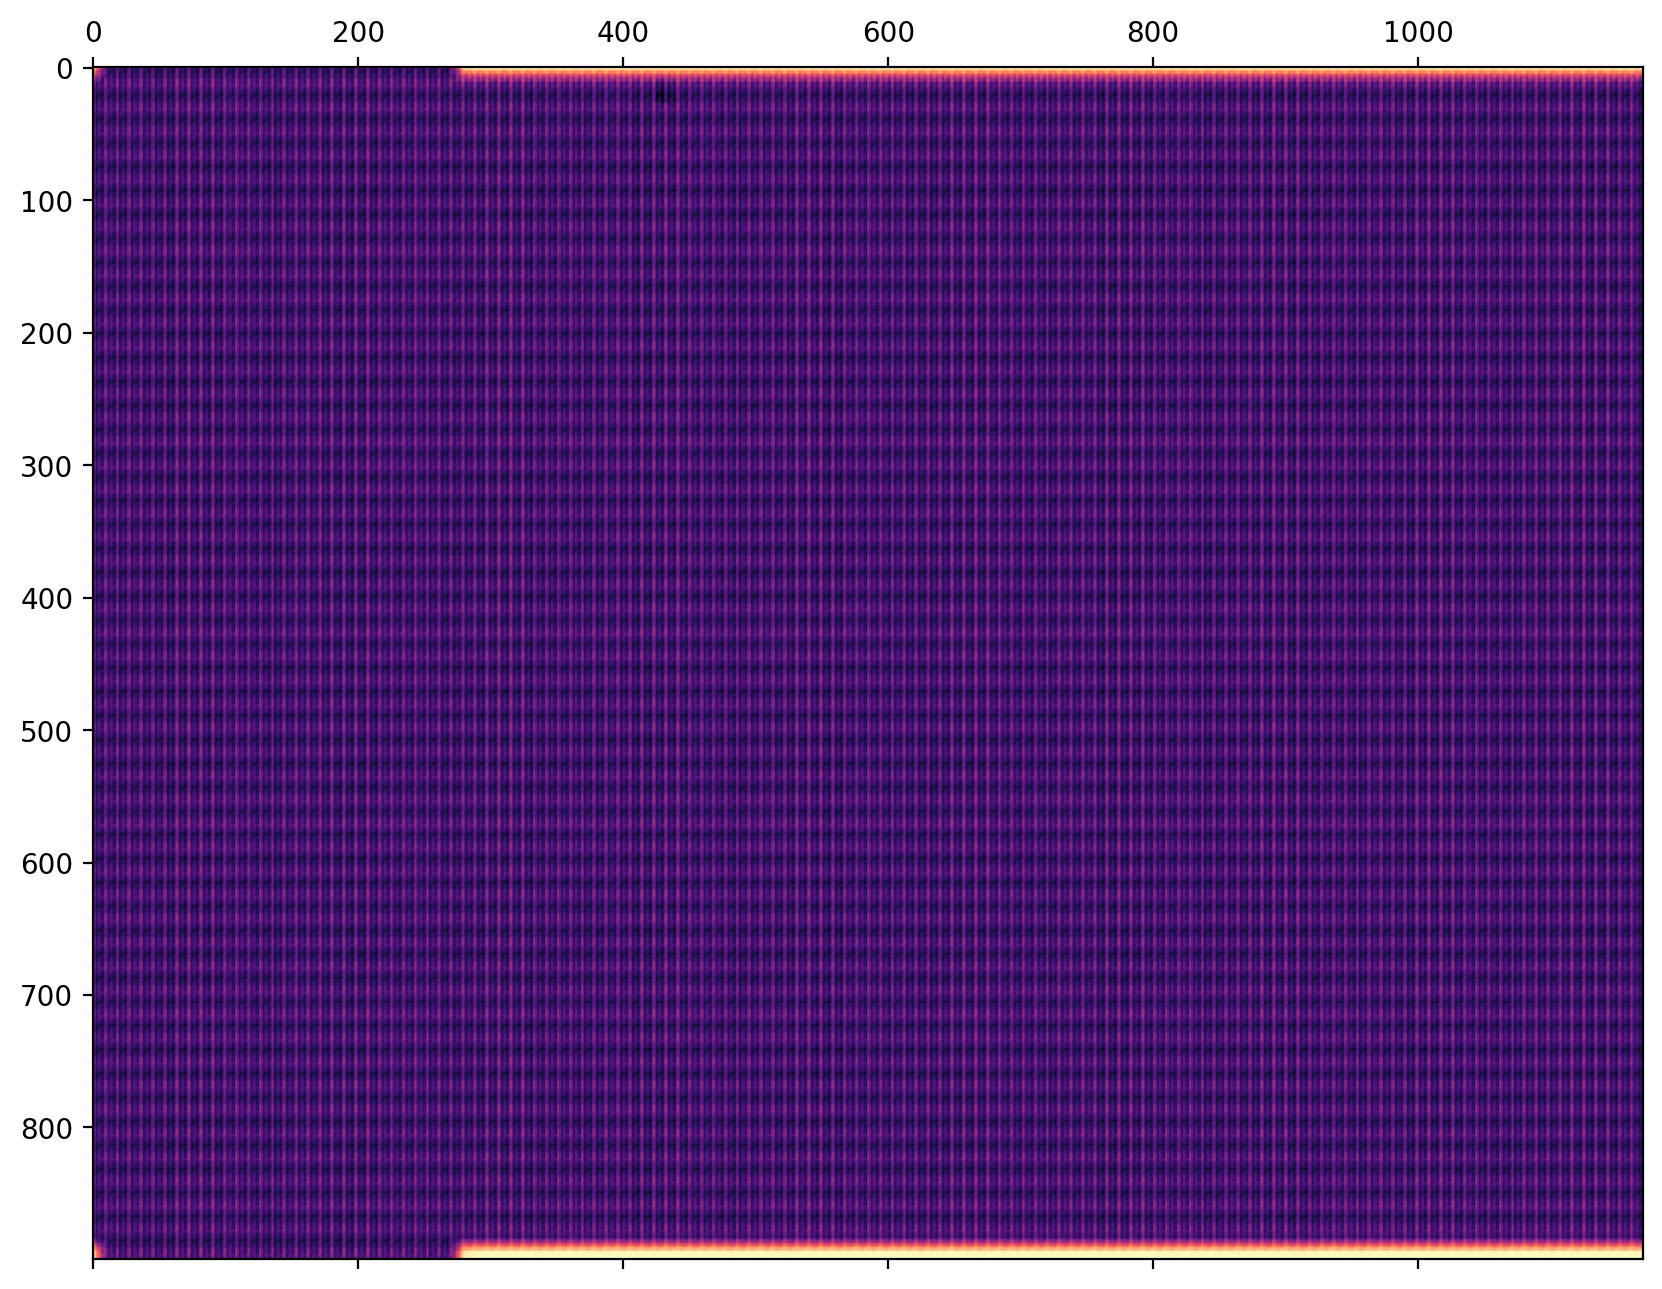

In [51]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
ax.matshow(xcorr, cmap=plt.magma());

## some book keeping for the notebook

In [52]:
%load_ext watermark
%watermark -i -h -m -v -p numpy,matplotlib,imageio  -r -g -b

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.17.2

numpy     : 1.26.2
matplotlib: 3.8.1
imageio   : 2.31.5

Compiler    : Clang 15.0.0 (clang-1500.0.40.1)
OS          : Darwin
Release     : 23.2.0
Machine     : arm64
Processor   : arm
CPU cores   : 10
Architecture: 64bit

Hostname: obiwan.local

Git hash: fc123bb700ef75031fad424240cd44058efc09c5

Git repo: https://github.com/laurentperrinet/sciblog

Git branch: master

